# Carga datos places desde el bucket de AWS

In [1]:
"""   Librerías   """
import pandas as pd # Manipulación y EDA
import numpy as np # Manipulación y EDA
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos
from dataAccess import aws_df_from_S3_csv # AWS

## Definición de funciones AWS

In [2]:
df_micole = aws_df_from_S3_csv("Arnau/datos_colegios_clean.csv")
df_micole.head()

,_id,name,address,price,review,description,type,query,coord,latitude,longitude
0,0,Virgen Del Cerro,"Calle Mohernando 1, 28038, Madrid, Madrid",Menos de 100€/mes,4.3 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school Virgen Del Cerro, Calle Mohernando 1, 2...","40.3960957,-3.6490087",40.396096,-3.649009
1,1,República Del Paraguay,"Calle Manresa 60, 28034, Madrid, Madrid",Menos de 100€/mes,4.7 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school República Del Paraguay, Calle Manresa 6...","40.492446,-3.695208",40.492446,-3.695208
2,2,San José De Valderas,"Avenida de los Derechos Humanos 6, 28924, Alco...",Menos de 100€/mes,4.1 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school San José De Valderas, Avenida de los De...","40.3534264,-3.8153475",40.353426,-3.815348
3,3,Filosofo Séneca,"Calle Santa Adela 21, 28033, Madrid, Madrid",Menos de 100€/mes,4.1 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school Filosofo Séneca, Calle Santa Adela 21, ...","40.4783861,-3.6502275",40.478386,-3.650228
4,4,Beatriz Galindo,"Calle de Goya 10, 28001, Madrid, Madrid",Menos de 100€/mes,3.5 estrellas,"Instituto Público de Educación Secundaria, Bac...",Publico,"school Beatriz Galindo, Calle de Goya 10, 2800...","40.4250762,-3.6864769",40.425076,-3.686477


In [3]:
df_micole.type.value_counts()

Publico       715
Privado       654
Concertado    389
Name: type, dtype: int64

In [4]:
df_micole.price.value_counts()

Menos de 100€/mes        715
Entre 300€ y 700€/mes    637
Entre 100€ y 300€/mes    388
Más de 700€/mes           18
Name: price, dtype: int64

In [5]:
df_micole["price_level"] = df_micole.price.apply(lambda x: 1 if x == "Menos de 100€/mes" else x)
df_micole["price_level"] = df_micole.price_level.apply(lambda x: 2 if x == "Entre 100€ y 300€/mes" else x)
df_micole["price_level"] = df_micole.price_level.apply(lambda x: 3 if x == "Entre 300€ y 700€/mes" else x)
df_micole["price_level"] = df_micole.price_level.apply(lambda x: 4 if x == "Más de 700€/mes" else x)

df_micole.head()

,_id,name,address,price,review,description,type,query,coord,latitude,longitude,price_level
0,0,Virgen Del Cerro,"Calle Mohernando 1, 28038, Madrid, Madrid",Menos de 100€/mes,4.3 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school Virgen Del Cerro, Calle Mohernando 1, 2...","40.3960957,-3.6490087",40.396096,-3.649009,1
1,1,República Del Paraguay,"Calle Manresa 60, 28034, Madrid, Madrid",Menos de 100€/mes,4.7 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school República Del Paraguay, Calle Manresa 6...","40.492446,-3.695208",40.492446,-3.695208,1
2,2,San José De Valderas,"Avenida de los Derechos Humanos 6, 28924, Alco...",Menos de 100€/mes,4.1 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school San José De Valderas, Avenida de los De...","40.3534264,-3.8153475",40.353426,-3.815348,1
3,3,Filosofo Séneca,"Calle Santa Adela 21, 28033, Madrid, Madrid",Menos de 100€/mes,4.1 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school Filosofo Séneca, Calle Santa Adela 21, ...","40.4783861,-3.6502275",40.478386,-3.650228,1
4,4,Beatriz Galindo,"Calle de Goya 10, 28001, Madrid, Madrid",Menos de 100€/mes,3.5 estrellas,"Instituto Público de Educación Secundaria, Bac...",Publico,"school Beatriz Galindo, Calle de Goya 10, 2800...","40.4250762,-3.6864769",40.425076,-3.686477,1


# EDA

In [ ]:
df_micole = awsFunctions.aws_df_from_S3_csv("Arnau/micole_final.csv")
df_micole.head()

In [6]:
# Número de registros que contiene el dataset
print("El dataset contiene un total de {} colegios.\n".format(len(df_micole)))

El dataset contiene un total de 1758 colegios.



In [7]:
df_micole.price_level.value_counts()

1    715
3    637
2    388
4     18
Name: price_level, dtype: int64

In [8]:
df_micole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          1758 non-null   int64  
 1   name         1758 non-null   object 
 2   address      1758 non-null   object 
 3   price        1758 non-null   object 
 4   review       1758 non-null   object 
 5   description  1758 non-null   object 
 6   type         1758 non-null   object 
 7   query        1758 non-null   object 
 8   coord        1758 non-null   object 
 9   latitude     1758 non-null   float64
 10  longitude    1758 non-null   float64
 11  price_level  1758 non-null   int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 164.9+ KB


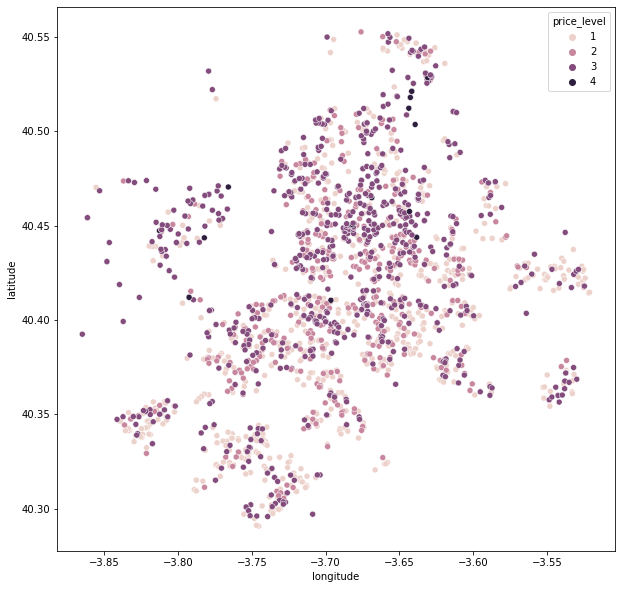

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', data=df_micole, hue='price_level')
plt.show()

In [11]:
df_micole["price_level_weights"] = df_micole.price_level.apply(lambda x: 1/2701 if x == 1 else x)
df_micole["price_level_weights"] = df_micole.price_level_weights.apply(lambda x: 200/2701 if x == 2 else x)
df_micole["price_level_weights"] = df_micole.price_level_weights.apply(lambda x: 500/2701 if x == 3 else x)
df_micole["price_level_weights"] = df_micole.price_level_weights.apply(lambda x: 2000/2701 if x == 4 else x)

df_micole.head()

,_id,name,address,price,review,description,type,query,coord,latitude,longitude,price_level,price_level_weights
0,0,Virgen Del Cerro,"Calle Mohernando 1, 28038, Madrid, Madrid",Menos de 100€/mes,4.3 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school Virgen Del Cerro, Calle Mohernando 1, 2...","40.3960957,-3.6490087",40.396096,-3.649009,1,0.00037
1,1,República Del Paraguay,"Calle Manresa 60, 28034, Madrid, Madrid",Menos de 100€/mes,4.7 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school República Del Paraguay, Calle Manresa 6...","40.492446,-3.695208",40.492446,-3.695208,1,0.00037
2,2,San José De Valderas,"Avenida de los Derechos Humanos 6, 28924, Alco...",Menos de 100€/mes,4.1 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school San José De Valderas, Avenida de los De...","40.3534264,-3.8153475",40.353426,-3.815348,1,0.00037
3,3,Filosofo Séneca,"Calle Santa Adela 21, 28033, Madrid, Madrid",Menos de 100€/mes,4.1 estrellas,Colegio Público de Educación Infantil y Primaria,Publico,"school Filosofo Séneca, Calle Santa Adela 21, ...","40.4783861,-3.6502275",40.478386,-3.650228,1,0.00037
4,4,Beatriz Galindo,"Calle de Goya 10, 28001, Madrid, Madrid",Menos de 100€/mes,3.5 estrellas,"Instituto Público de Educación Secundaria, Bac...",Publico,"school Beatriz Galindo, Calle de Goya 10, 2800...","40.4250762,-3.6864769",40.425076,-3.686477,1,0.00037


In [12]:
df_micole.to_csv("micole.csv", index = False)

## Agregación a los datos de Idealista

In [ ]:
# Cargamos los datos de las viviendas de Idealista
df_idealista = awsFunctions.aws_df_from_S3_csv('Juanma/depDataFull_Juanma_28-07.csv')
df_idealista.head()

In [ ]:
def isInside(circle_x, circle_y, x, y):
    """ Devuelve True si el punto está dentro del radio definido """
    rad = 2*60/6371 # Radio = 2km-0.38, 3km-0.39
    if ((x - circle_x)**2 + (y - circle_y)**2 <= rad**2):
        return True;
    else:
        return False;

def agregarFE(lon, lat):
    """ Devuelve la media de la variable price_level_weights de los puntos cercanos """
    df_micole["isInside"] = df_micole.apply(lambda x: isInside(lon, lat, x["longitude"], x["latitude"]), axis = 1)
    nearby_weights_mean = df_micole[df_micole["isInside"] == True].price_level_weights.mean()
    return nearby_weights_mean

In [ ]:
df_idealista["fe_micole_weights"] = df_idealista.apply(lambda x: agregarFE(x["ide_longitude"], x["ide_latitude"]), axis = 1)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_idealista.select_dtypes(include='number').corr(), annot=True)
plt.show()

In [ ]:
print("Media: ",df_idealista.fe_micole_weights.mean())
print("Mediana: ",df_idealista.fe_micole_weights.median())

In [ ]:
df_idealista.to_csv('depDataFull_Arnau_28-07_v2.csv', index = False)